# Lecture 12:  Fourier Series
----

### Sections

* [Introduction](#Introduction)
* [Learning Goals](#Learning-Goals)
* [On Your Own](#On-Your-Own)
    * [Useful Function](#Useful-Function)
    * [Representations of a Wave](#Representations-of-a-Wave)
    * [A Vector Space](#A-Vector-Space)
    * [Interactive Visualization of the Dot Product of Functions](#Interactive-Visualization-of-the-Dot-Product-of-Functions)
* [In Class](#In-Class)
    * [The Inner Product of Functions](#The-Inner-Product-of-Functions)
    * [Formal Definition of a Fourier Series](#Formal-Definition-of-a-Fourier-Series)
    * [Computing Fourier Coefficients by Hand](#Computing-the-Fourier-Coefficients-by-Hand)
    * [Computing the Fourier Coefficients using Sympy](#Computing-the-Fourier-Coefficients-using-Sympy)
* [Homework](#Homework)
    * [Fourier Series](#Fourier-Series)
    * [Numerical Computation of the Structure Factor](#Numerical-Computation-of-the-Structure-Factor)
* [Summary](#Summary)
* [Looking Ahead](#Looking-Ahead)
* [Reading Assignments and Practice](#Reading-Assignments-and-Practice)

### Introduction
----

Series solutions appear in a lot of different engineering contexts.  In materials engineering you will sometimes see diffusion problems use series solutions to describe the evolution of a concentration field.  You will often see solutions to the diffusion problem where there is a series factor and an exponential factor.  Together they describe the diffusive evolution of a system.  A classic example of a Fourier series in a diffusion problem is in Jackson and Hunt's paper on eutectic solidification.  In that paper the boundary condition was represented by a Fourier series to model the composition profile across eutectic lamellae.

In this lecture we will compute Fourier coefficients and learn how to shift them to arbitrary center points and domain widths.

[Top of Page](#Sections)

### Learning Goals
----
1. Understand the basis for Fourier series representation of functions.
1. Become knowledgable about the definition of the inner product of functions.
1. Practice using Python to numerically and symbolically compute the coefficients of the series.

[Top of Page](#Sections)

### On Your Own
----

#### Useful Function

Here is a little function that gives you a list from `start` to `stop` in `steps`.  You can pass numbers or `sympy` objects to this function.  This function helps us create symbolic lists (since `range` isn't something we can call with `sympy` objects).

In [ ]:
from sympy import pi, init_printing, sin
init_printing()

def fancy_range(start, stop, step):
    while start <= stop:
        yield start
        start += step

sf = list(fancy_range(0,2*pi,pi/3))
sf

In [ ]:
nf = list(fancy_range(0,2,0.3))
nf

[Top of Page](#Sections)

#### Representations of a Wave

In this block we create a plot using Matplotlib and Numpy.  While this works just fine - we will drift back and forth between Sympy plotting and Matplotlib plotting at the start of this lecture.  Later we will `lambdafy` sympy functions for the purpose of numerical computing.  

Consider a sine wave with an amplitude and frequency:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Problem inputs.
amplitude = 2.4
frequency = 2*np.pi/3.

# Create a range of 100 data points evenly spaced between 0 and 2\pi
t = np.linspace(0, 2*np.pi, 200)

fig, ax = plt.subplots()

ax.plot(t, amplitude*np.sin(2*np.pi*frequency*t), label=r"$A(t) = \sin(2 \pi f t)$")
ax.legend(loc=1) # upper right corner
ax.set_xlabel(r'$t$', fontsize=18)
ax.set_ylabel(r'$A$', fontsize=18)
ax.set_title('A Sine Wave');

You can capture all of its properties just with the folowing information:

1. It is a sine wave
1. It has amplitude 2.4
1. It has frequency 2/3

You could represent it as a graph that is defined over the entire x-axis, but it would be much more compact to just remember these 3 pieces of information. You could even represent this information on an amplitude-frequency chart if you know you are only working with sines.  Let us start by identifying a list of possible frequencies - where one element of the list contains $2\pi/3$:

Here is another way to plot the same information.  Note how I chose to construct amplitude and frequency - as lists.  This is intentional for what is to come next.

In [ ]:
from sympy import symbols, pi, init_printing, sin, plot
t = symbols('t')
init_printing()

amplitudes = [0,0,2.4,0,0,0,0]
frequencies = list(fancy_range(0,2*pi,pi/3))
equation = sum([amplitude*sin(2*pi*frequency*t) for (amplitude,frequency) in zip(amplitudes,frequencies)])
plot(equation, (t,0,2*pi));

You'll want to examine what `zip` does and how list comprehensions are used.

In the previous plot we know that the frequency of $2\pi/3$ and coefficient (amplitue) of $2.4$ were linked through the `sin` function.  So it isn't hard to extrapolate to a situation where we might have MANY functions each with their own amplitude.  We could also imagine having many `sin` functions each with a different frequency - so let us make a list of amplitudes and frequencies (numerically) that we can use for plotting.  The following histogram plots the amplitudes for each frequency.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# This one we have to create by hand.
amplitudes = [0,0,2.4,0,0,0,0]
frequencies = list(fancy_range(0,2*np.pi,np.pi/3))

fig, ax = plt.subplots()
ax.bar(frequencies, amplitudes)
ax.set_xlabel(r'$f$', fontsize=18)
ax.set_ylabel(r'$A$', fontsize=18)
ax.set_title('Power Spectrum');

The plot above is one common way of visualizing the amplitudes of each term in a series.  Each bar represents the amplitude of a particular frequency.  In the above case we have one frequency with amplitude 2.4.  While this example may seem mundane - when you get many frequencies together, such plots can convey more insight into complex functions. 

In [ ]:
from sympy import symbols, pi, init_printing, sin, plot
t = symbols('t')
init_printing()

amplitudes = [0,0,1.0,0.25,0.5,0,0]
frequencies = list(fancy_range(0,2*pi,pi/3))
equation = sum([amplitude*sin(2*pi*frequency*t) for (amplitude,frequency) in zip(amplitudes,frequencies)])
plot(equation, (t,0,pi));

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

amplitudes = [0,0,1,0.25,0.5,0,0]
frequencies = list(fancy_range(0,2*np.pi,np.pi/3))

fig, ax = plt.subplots()
ax.bar(frequencies, amplitudes)
ax.set_xlabel(r'$f$', fontsize=18)
ax.set_ylabel(r'$A$', fontsize=18)
ax.set_title(r'Power Spectrum');

[Top of Page](#Sections)

#### A Vector Space

The set of all vectors having dimension N is a "vector space".  Sines and cosines (with the appropriate arguments) are orthogonal elements of a vector space.  It can be shown that their inner product is zero (in the same way that the inner (dot) product of Euclidian vectors are zero if they are orthogonal).  We will write the inner product in an integral form that is a specific definition for functions.  

Before we move on to that exercise we will do a little bit of thinking around waves and how we represent them.  Consider this signal that we define and require that it be periodic with a specified period.

In [ ]:
%matplotlib inline

from sympy import symbols, init_printing, plot
t = symbols('t')
init_printing()

def signal(x):
    return (x*(2 - x)*(1 - x)**2)

plot(signal(t), (t,0,2));

You want to reproduce this signal, but your signal generator can only produce sines and cosines (this is quite typical of an electrical engineering signal processing problem - different circuits produce different waveforms). Can you fit some sines & cosines to it and have at least an *approximation* to this waveform? With the restriction that the function is periodic on this domain? Yes!

The approach is to represent the function as a sum of sines and cosines (and you should be skeptical - you only have my assurances that this is correct).  But at this point - we don't have a clue what the amplitudes would be.

We know that the natural choice of functions are sines and cosines with a periodicity that matches that of the signal, P (= 2 in this case). So, they should have wavelengths of P, P/2, P/3, P/4, etc. This choice turns out to also have a very useful property: such functions are all mutually orthagonal. Recall the concept of orthagonality from linear algebra: it means that their dot product is zero. For a function, the dot product is replaced by the inner product, defined as:

$$ < f(x) | g(x) > = \int_{-L}^{L} f(x) g(x) dx $$

If this is zero, then the functions are orthagonal. If orthagonal functions are linearly combined, then each contributes to the total sum independantly.  This is very useful because each sine/cosine contribution to the approximation can be computed independantly.

Why is this the "dot product" for functions anyway? Recall that the dot product for vectors v and w tells you how much v points along w, i.e., how much of v you need to add to some other (mutually orthagonal) vectors in order to sum reproduce w. This is exactly what we are after in terms of functions: how much of function 1 do you have to add to some other (mutually orthagonal) functions to reproduce your desired function. If it helps, I think of the idea of "how much" as a projection of one function in terms of another.  Maybe a shadow analogy works here, too?

You can see that the inner product

$$ < f(x) | g(x) > = \int_{-L}^{L} f(x) g(x) dx $$

is the correct choice as the "continuous" version of the dot product if you think about what this does: Look at the point x = a. Compute f(a) and g(a). f(a) and g(a) represent the height of each function above/below the x-axis, so a vector from (a, 0) to (a, f(a)) can be dotted with a vector from (a, 0) to (a, g(a)). They are necessarily parallel, so their dot product is just the product of their magnitudes = f(a) times g(a). Now, multiply this by dx to keep the contribution from position x=a proportional to how many additional x-positions you'll do this for. Take this dot product over and over, at each x-position, always scaling by dx to keep it all in proportion. The sum of these dot products is the projection of f(x) onto g(x) (or vice-versa).

The next visualization is presented to help you see how the "dot product of functions" or the inner product works graphically.

[Top of Page](#Sections)

#### Interactive Visualization of the Dot Product of Functions

In [ ]:
%matplotlib inline

import sympy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

def npf(x):
    return np.sin(2*x)

def npg(x):
    return np.sin(x)

def spf(x):
    return sp.sin(2*x)

def spg(x):
    return sp.sin(x)

# Make ff and gg tuples of np/sp functions? - or we can lambdafy the sp functions.
def myfig(ff,gg,a):
    """
    This function's docstring explaining the function.
    """
    x = np.linspace(0, 2*np.pi, 100)
    y1 = ff(x)
    y2 = gg(x)
    y3 = ff(x)*gg(x)
    fig = plt.figure(figsize=(10,8))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.plot(x, y1, 'r', label=r"$f(x)$")
    axes.arrow(a, 0, 0, ff(a), length_includes_head=True, head_length=0.1, head_width=0.1, color='r')
    axes.plot(x, y2, 'g', label=r"$g(x)$")
    axes.arrow(a, 0, 0, gg(a), length_includes_head=True, head_length=0.1, head_width=0.1, color='g')
    axes.plot(x, y3, 'b', label=r"$f(x) \cdot g(x)$")
    axes.arrow(a, 0, 0, ff(a)*gg(a), length_includes_head=True, head_length=0.1, head_width=0.1, color='b')
    axes.legend()
    axes.grid(True)
    return

# Somehow we want to add this text to the plot...
# dot_prod_value = sp.integrate(sp.sin(2*x)*sp.sin(x), (x, 0, 2*sp.pi))

interact(myfig, ff=fixed(npf), gg=fixed(npg), a=(0,np.pi*2,0.05));

In [ ]:
from scipy import integrate
import numpy as np

def myfunc1(x):
    return np.sin(4*x)

def myfunc2(x):
    return np.sin(x)

def myfunc3(x):
    return myfunc1(x)*myfunc2(x)

integrate.quad(myfunc3, 0, 2*np.pi)

Is this zero?  Read the `quad` docs to understand the return value!  Maybe do this symbolically.

In [ ]:
import sympy as sp
sp.init_printing()

n, m = sp.symbols('n m', Integer=True)
x = sp.symbols('x')

def f(x):
    return sp.sin(n*x)

def g(x):
    return sp.sin(m*x)

# scope of variables in def is local.
def func_dot(f, g, lb, ub):
    return sp.integrate(f(x)*g(x), (x, lb, ub))

func_dot(f, g, 0, 2*sp.pi)

The return value is zero for these two particular functions.  If you are feeling brave - why not see if you can symbolically construct a result from the inner product integration that demonstrates the inner product is zero for every pair of frequency/period choices in $\sin(ax)$ and $\sin(bx)$.

[Top of Page](#Sections)

### In Class
----

#### Fourier Series and The Inner Product of Functions

For periodic functions (under certain restrictions) it is possible to write an approximation of the function using what is called a Fourier Series:

$$f(x) = \sum_{k=-\infty}^{k=\infty} \hat{f}(k) e^{ikx} $$

The inner product of functions is

$$ < f(x) | g(x) > = \int_{-L}^{L} f(x) g(x) dx $$

Using these two pieces of information together you can demonstrate that an infinite series of sines and cosines can be used to represent a function $f(x)$.  There are many texts and writings on this topic.  If you find a good one, let me know!

[Top of Page](#Sections)

#### Formal Definition of a Fourier Series

Fourier series are covered in the Wikipedia article here.  Arfken gives a succint definition of the series:  "an expansion of a function or representation of a function in a series of sines and cosines."

$$f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n cos(nx) + \sum_{m=0}^{\infty} b_m sin(mx)  $$

The detail left for us is to compute the coefficients GIVEN the function.  We start by defining the function we wish to represent in the Fourier series.  The values of the coefficients are given by:

$$ a_n = \langle f(x) | \cos \left( \frac{n\pi x}{L} \right) \rangle $$

(the magnitude for each sine wave is the projection of that sine wave onto the original function) and

$$ b_n = \langle f(x) | \sin \left( \frac{n\pi x}{L} \right) \rangle $$

(the magnitude for each cosine wave is the projection of that sine wave onto the original function).  Using our generalized dot product function as defined above we can compute the Fourier coefficients.  The code for this follows in functions `a_n_amplitudes` and `b_m_amplitudes`.

Let me pause here for a second - the lectures up to this point have been tame.  This is the first real deep dive into `sympy`, `numpy` and a mathematical topic like Fourier series.  Your head is probably spinning around and you don't know which way is up.

Take a moment to reflect on what I'm trying to do with you here.  I'm asking you to:

* think in a new paradigm (Python notebook);
* start using a CAS to do symbolic manipulation;
* think computationally;
* implement an abstract mathematical idea;
* visualize the results in a meaningful way.

On my best day I probably couldn't do all of these things at once.  So - I'm not expecting you to get it all right the first time.  In fact - I'm expecting you to get it wrong every time the first time and to correct one little thing with each revision.

Heads up - by the end of the class your homework assignments should look a bit like the next code block.  Some parameters, functions, etc. that I can use to test your work.  I know that you aren't able to do this yet - in time you will, though.

Let me explain the ideas around the next code block:

* We define two functions that we can play around with: `signal` and `mySpecialFunction`.  These are the functions that we will project onto the Fourier basis.  So - feel free to change these functions and insert them into the function calls below.  Start with simple functions that will integrate quickly.  The `signal` function takes rather long to integrate and I'm not sure why.
* We define a set of four functions that will compute the basis vectors for each of the series.

[Top of Page](#Sections)

#### Computing the Fourier Coefficients by Hand

In [ ]:
import sympy as sp
import numpy as np

x = sp.symbols('x')
dum = sp.symbols('dum')
sp.init_printing()

lam = 2
center = 1

def signal(x):
    return (x*(2 - x)*(1 - x)**2)

def mySpecialFunction(x):
    return sp.sin(2*x)+sp.sin(x)

def b_n_amplitudes(n, funToProject, center, lam):
    return (2/lam)*sp.integrate(funToProject(dum)*sp.sin(2*n*sp.pi*dum/lam), (dum,center-lam/2,center+lam/2))

def a_m_amplitudes(m, funToProject, center, lam):
    return (2/lam)*sp.integrate(funToProject(dum)*sp.cos(2*m*sp.pi*dum/lam), (dum,center-lam/2,center+lam/2))

def b_n_vectorspace_element(n, var, lam):
    return sp.sin(2*n*sp.pi*var/lam)

def a_m_vectorspace_element(m, var, lam):
    if m==0:
        return sp.Rational(1,2)
    elif m!=0:
        return sp.cos(2*m*sp.pi*var/lam)

We can use a list comprehension to collect the basis vectors and amplitudes in a useful data structure.

In [ ]:
terms = 5

an_vectors = [a_n_vectorspace_element(n, x, lam) for n in range(terms)]
an_amplitudes = [a_n_amplitudes(n, signal, center, lam) for n in range(terms)]
bm_vectors = [b_m_vectorspace_element(m, x, lam) for m in range(terms)]
bm_amplitudes = [b_m_amplitudes(m, signal, center, lam) for m in range(terms)]

In [ ]:
truncatedSeries = (sum([a*b for a,b in zip(an_vectors,an_amplitudes)]) 
                   + sum([c*d for c,d in zip(bm_vectors,bm_amplitudes)]))
truncatedSeries

We can now plot this series and see the comparison of the signal (blue) and the series representation (red).  We can quantitatively describe the accuracy between the approximation and the function.

In [ ]:
%matplotlib inline

p = sp.plot(signal(x), truncatedSeries, (x, 0, 2), show=False, title=r'Comparison of Series and Function')
p[0].line_color = 'blue'
p[1].line_color = 'red'
p.show()

It is also possible to unpack the series above and look at the plot of each individual term's contribution to the approximate function.

In [ ]:
test = [c*d for c,d in zip(bm_vectors,bm_amplitudes)]

p2 = sp.plot(test[0],(x,0,2), show=False)

[p2.append(sp.plot(test[i], (x,0,2), show=False)[0]) for i in range(1,5,1)]

for i in range(1,5,1):
    #p = sp.plot(test[i], (x,0,2), show=False)
    #p2.append(p[0])
    p2[i].line_color = 1.0-i/5.0,i/5.0,0.3

[p2.append(sp.plot(test[i], (x,0,2), show=False)[0])]
    
p2.show()

[Top of Page](#Sections)

#### Computing the Fourier Coefficients using Sympy

Here we use `sympy`'s `fourier_series` function to build a truncated series. We plot the series so that you can explore what happens when you change the number of terms.  The `interact` command creates a widget you can use to explore the effect of changing the nubmer of terms.

In [ ]:
%matplotlib inline

import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

sp.init_printing()

x = sp.symbols('x')

def myAwesomeFunction(a):
    return a

def fsMyFunc(terms, var):
    return sp.fourier_series(myAwesomeFunction(var), (var, -sp.pi, sp.pi)).truncate(n=terms)

def plotMyFunc(terms):
    p1 = sp.plot(fsMyFunc(terms,x),(x,-sp.pi, sp.pi), show=False, line_color='r')
    p2 = sp.plot(myAwesomeFunction(x), (x,-sp.pi,sp.pi), show=False, line_color='b') 
    p2.append(p1[0])
    p2.show()
    return None

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = 8, 6
interact(plotMyFunc, terms=(1,10,1));

This command takes a while to run, but you can compare the output of this command with the Fourier series you computed by hand at the top of this workbook.

In [ ]:
%matplotlib inline
import sympy as sp
sp.init_printing()

x = sp.symbols('x')

In [ ]:
sOfXSquared = sp.fourier_series(x**2,(x,-1,1))
sOfXSquared

In [ ]:
sOfXSquared.truncate(n=4)

In [ ]:
p1 = sp.plot(sOfXSquared.truncate(6), (x,0,1), line_color='b', show=False);
p2 = sp.plot(x**2, (x,0,1), line_color='r', show=False);

p2.append(p1[0])
p2.show()

[Top of Page](#Sections)

#### The Reciprocal Lattice and the Structure Factor

From Pam Champness' book "Electron Diffraction in the Transmission Electron Microscope" she defines the reciprocal lattice as, "...a lattice of spots, each of which represents a set of planes $(hkl)$ of spacing $d$ in the real lattice."

Let us deconstruct this a bit.  

* Spacing in the real lattice and planes $(hkl)$ can be confusing for students.  We spend a lot of time thinking about what atoms are on different $(hkl)$ planes we lose sight of the fact that these planes are imaginary.  They are merely periodicities in real-space.  
* $(hkl)$ is equally mysterious the way we present it in your core classes.  The reality is that $(hkl)$ are wave numbers.  Each integer value represents a real-space perodicity.  As the number goes up - the frequency goes up and the spacing (i.e. wavelength) goes down.  If you need a picture think of $(100)$ versus $(200)$ versus $(400)$, etc. in a cubic crystal.
* Reciprocal space is really a lattice of wave numbers in Fourier space.  Each point in reciprocal space is assigned a value of $(hkl)$ and you can imagine drawing a vector from the origin to that $(hkl)$.  The magnitude of that vector is inversely prorportional to the interplanar spacing in real-space.

Symbolically, the structure factor is:

$$F_{hkl} = \sum^{N}_{n=1} f_n \exp[2 \pi i (hx_n+ky_n+lz_n)]$$

### Homework
----

There are two problems in this homework set.

#### Fourier Series

Using a Fourier series, represent the following periodic function (a sawtooth wave):

$$f(x) = \left\{ 
\begin{array}{ll}
 x, & 0 \leq x \leq \pi, \\
 x-2\pi, & \pi \leq x \leq 2\pi,
\end{array}
\right.$$

At the risk of confusing things - I'm not going to provide a picture of the graph.  You should be able to sketch this function and understand why the function is an "odd" function and over what period the function repeats.  A picture can be found at [this](http://lpsa.swarthmore.edu/Fourier/Series/ExFS.html) site.  The function is under the section on "Odd Sawtooth Wave".

In [ ]:
# Your code goes here.

#### Numerical Computation of the Structure Factor

I provide a small class to help with the structure factor.  Create a visualization of the structure factor using the support code below.

In [1]:
import numpy as np
#import ivisual as iv

In [2]:
class basis_atom(object):
    
    def __str__(self):
        return self.__name__
    
    def __init__(self, x, y, z, scattering_factor):
        self.x = x
        self.y = y
        self.z = z
        self.scattering_factor = scattering_factor

In [ ]:
def structureFactor(x, y, z):
    
    # Your code goes here.
    
    return 0.3*x

In [ ]:
scene = iv.canvas(title="Reciprocal Space", height=600, width=600)

rslow = -2
rshigh = 3

# We create an empty list to hold all the spheres.
spheres = []

# These red spheres are the lattice points in reciprocal space.
spheres = [
    iv.sphere((h,k,l), radius=(0.05), color=(1,0,0)) 
    for h in range(rslow,rshigh,1) 
    for k in range(rslow,rshigh,1) 
    for l in range(rslow,rshigh,1) 
]

# These will be the representations of the structure factor.
spheres.extend([
    iv.sphere((h,k,l), radius=(structureFactor(h,k,l))) 
    for h in range(rslow,rshigh,1) 
    for k in range(rslow,rshigh,1) 
    for l in range(rslow,rshigh,1) 
])

[Top of Page](#Sections)

### Summary

TBA

[Top of Page](#Sections)

### Looking Ahead
----

As we move ahead in our studies we will come back to the idea of Fourier series.  If we allow the period to extend to infinity, then instead of a finite domain we can arrive at an integral form - the Fourier Transform.

Materials engineers use the Fourier transform to understand atomic structure - a diffraction pattern is a type of integral transform that helps us understand spatial arrangements of mass (atoms).  

Also - we will find ourselves performing a so-called "spectral decomposition" of our field variables so that we can solve differential equations using spectral methods.  Doing this we will continue to refine our ideas of vector spaces and linear transformations.

[Top of Page](#Sections)

### Reading Assignments and Practice
----

* Arfken has a nice chapter on Fourier Series.
* Practice computing the series using the generalized integrals I've provided.  You can shift center points and domain widths.  Being flexible with the parameters of the integrals will help you deal with many different situations.

[Top of Page](#Sections)

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
x = sp.symbols('x')

In [3]:
sawtooth = sp.Piecewise((x, x < sp.pi), 
                        (x - 2*sp.pi, x >= sp.pi))

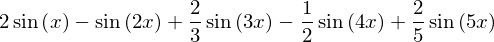

In [18]:
s = sp.fourier_series(x, (x, -sp.pi, sp.pi)).truncate(n=5)
s

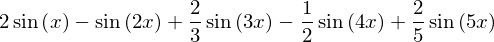

In [19]:
st = sp.fourier_series(sawtooth, (x, 0, 2*sp.pi)).truncate(n=5)
st

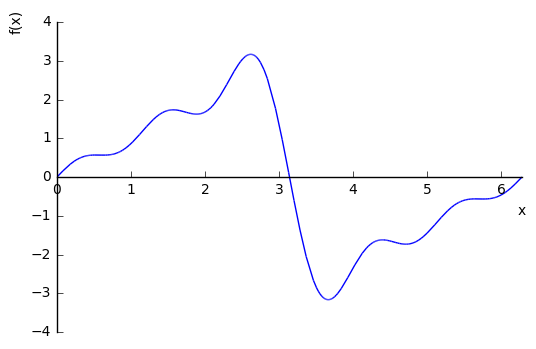

In [20]:
sp.plot(s, (x,0,2*sp.pi))